In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

In [2]:
import librosa as lib
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy as sp
from sklearn import preprocessing
from librosa import display as play
import IPython.display as disp
%matplotlib notebook

## Ejercicio 1.
1. Seleccionar un audio a gusto, en formato wav preferiblemente.
1. Analizar dicho audio mediante python de manera visual. 
1. Encontrar analíticamente valores máximos, mínimos y medio.

## Cargar audio

Se hace uso de la librería "librosa", que se encargará de cargar el archivo de audio, lo cual servirá para realizar un posterior análisis.

In [3]:
path="audio_analisis/breaking_bad_intro.wav"
sig,fs= lib.load(path, sr = 44100)
print(sig)

[ 0.          0.          0.         ... -0.00035095 -0.00028992
 -0.00032043]


## Reproducción del archivo de audio (.wav)

Se realiza un display donde se puede reproducir la señal de audio que se ha cargado previamente.

In [4]:
disp.Audio(data=sig,rate=fs)

## Gráfico de la señal

Se gráfica la señal de audio en sus componentes de amplitud y en tiempo en muestras.

<IPython.core.display.Javascript object>


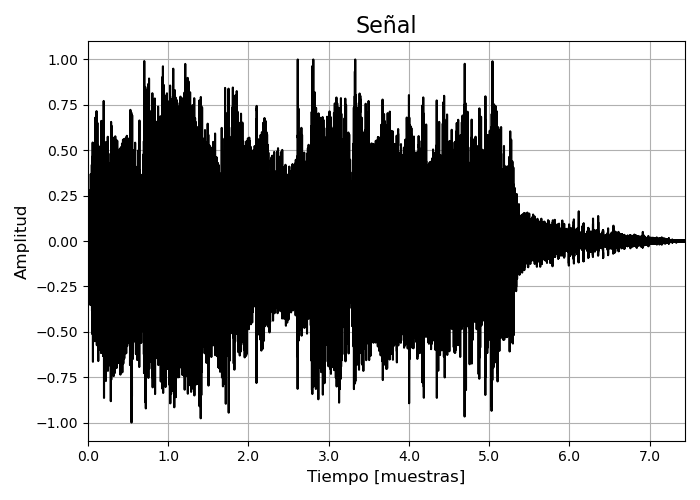

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(sig,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(sig)])
ticks=[i for i in range(0,len(sig),int(1e5))]
ticks1=[i/1e5 for i in range(0,len(sig),int(1e5))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1);

## Valor mínimos de la señal

A continuación, se encuentra el valor mínimo de la señal y los tiempos en los cuales se encontrarán esos valores.

In [9]:
matriz_signal=np.array(sig)
signal_abs=np.abs(sig)
signal_min=np.min(signal_abs)
minimo=np.min(signal_abs[np.nonzero(signal_abs)])
print("Valor mínimo:", minimo)
tiempo_min=np.abs(np.where(matriz_signal==minimo))/fs

Valor mínimo: 1.5258789e-05


El valor mínimo obtenido es: 1.5258789e-05

## Valor máximo de la señal

A continuación, se encuentra el valor máximo de la señal y los tiempos en los cuales se ubicarán estos valores.

In [10]:
maximo = np.max(np.abs(sig))
print("Valor máximo:",maximo)
tiempo_max=np.abs(np.where(matriz_signal==maximo))/fs

Valor máximo: 0.9999695


El valor máximo obtenido es: 0.9999695

## Valor medio de la señal

Se calculó el valor medio de la señal a través de media artimética.

In [20]:
medio = np.mean(np.abs(sig))
print("Valor medio:", medio)

Valor medio: 0.1676308


El valor medio obtenido es: 0.1676308

## Ejercicio 2.
1. Normalizar audio mediante las siguientes tecnicas:
    1. Max Normalization.
    1. MinMax Normalization.
    1. RMS Normalization.
    1. Z-score Normalization.
    
> Para cada caso visualizar y analizar la señal resultante.

La idea principal detrás de la normalización / estandarización es siempre la misma. Las variables que se miden a diferentes escalas no contribuyen por igual a la función de ajuste y aprendizaje de los modelos y podrían terminar creando un sesgo. Por lo tanto, para lidiar con este problema potencial, la normalización por características, generalmente se usa antes del ajuste de los modelos.

### Max Normalization

La normalizacion maxima divide cada valor de la señal en su maximo valor individual, y el resultado es una distribucion en la que los valores varian aproximadamente en rango de $[-1, 1]$.

Esto está expresado mediante la siguiente ecuación:

$$
\begin{align*}
X_{norm} = \frac{x}{max(x)}
\end{align*}
$$

Donde:

* $X_{norm}$ señal normalizada.
* $x$ es la señal original.
* $max(x)$ es el valor máximo de la señal.

#### Código Max Normalization

In [21]:
valor_max1 = np.max(sig)
max_norm = sig/valor_max1

<IPython.core.display.Javascript object>


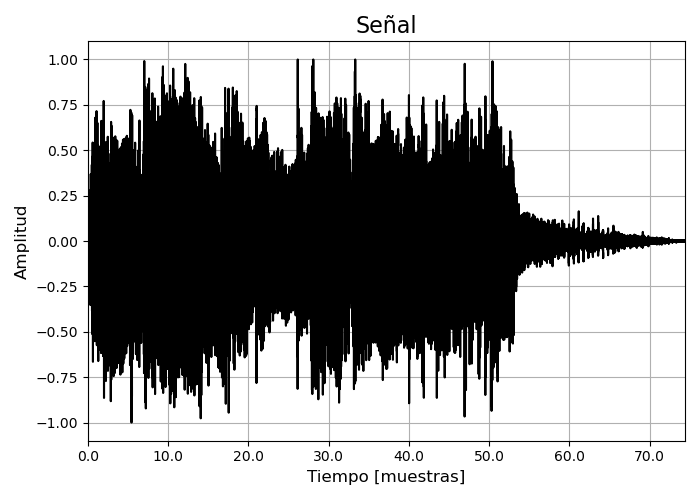

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(max_norm,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(max_norm)])
ticks=[i for i in range(0,len(max_norm),int(1e5))]
ticks1=[i/1e4 for i in range(0,len(max_norm),int(1e5))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1);

Analizando la señal normalizada resultante, los resultados posibles que se pueden obtener en la normalización del audio son rangos de $[-1, 1]$ o de $[0, 1]$ se puede apreciar que los valores de amplitud de la señal se encuentra en un rango de $[-1, 1]$.

### MinMax Normalization.

Este tipo de normalización consiste en la razon entre la señal menos el valor minimo de esta y la diferencia entre los valores maximos y minimos, esto representados mediante la siguiente ecuación:

$$
\begin{equation}
    y = \frac{x-min}{max-min}
\end{equation}
$$
Donde:


* x   $....................$ Señal de audio.
* min $.................$ Valor mínimo de la señal.
* max $................$ Valor máximo de la señal.
* y   $...................$ Resultado de la señal luego de aplicar la normalización de MinMax.



#### Código MinMax Normalization

In [13]:
valor_max2 = np.max(sig)
valor_min1 = np.min(sig)
min_max_norm = ((sig - valor_min1) / (valor_max2 - valor_min1))
print(min_max_norm)

[0.49985883 0.49985883 0.49985883 ... 0.4996833  0.4997138  0.49969855]


<IPython.core.display.Javascript object>


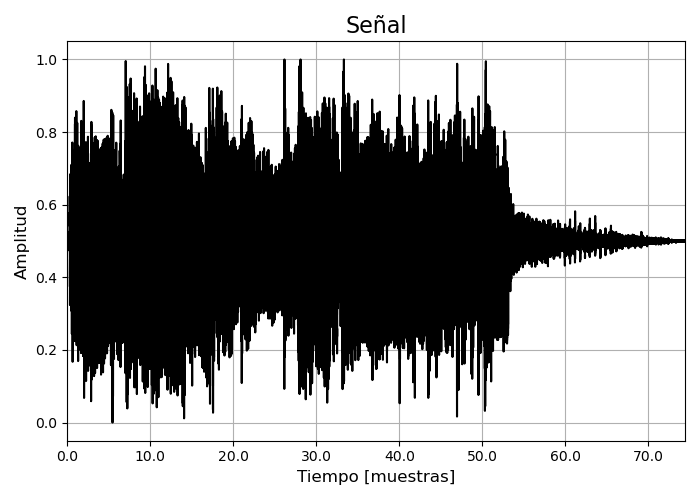

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(min_max_norm,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(sig)])
ticks=[i for i in range(0,len(min_max_norm),int(1e5))]
ticks1=[i/1e4 for i in range(0,len(min_max_norm),int(1e5))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1);

Al observar los valores obtenidos al realizar la normalización por MinMax, se puede notar que los valores de amplitud de la señal obtenida se ven desplazados con respecto al eje 0, donde encontramos que en esta nueva normalización los valores están ubicados en un rango de amplitud de $[0, 1]$.

### Normalizacion por Z-score.

Es una fórmula que permite la estandarización de una distribución.  Una distribución hace referencia a un conjunto de datos. Esta fórmula se calcula restando a la señal, la media de la distribución y dividiendo el resultado por la desviación típica (la distancia que tiene dicho dato respecto de la media).

\begin{equation}
    y = \frac{x-\mu}{\sigma}
\end{equation}
Donde:

* x   $................$ Señal de audio.
* $\mu$ $................$ Media de la distribución.
* $\sigma$ $................$ Desviación Típica.


#### Código de Z-score

In [15]:
mean = np.mean(sig)
standard_deviation = np.std(sig)
distance_from_mean = sig - mean 
zscore_norm = distance_from_mean/standard_deviation

<IPython.core.display.Javascript object>


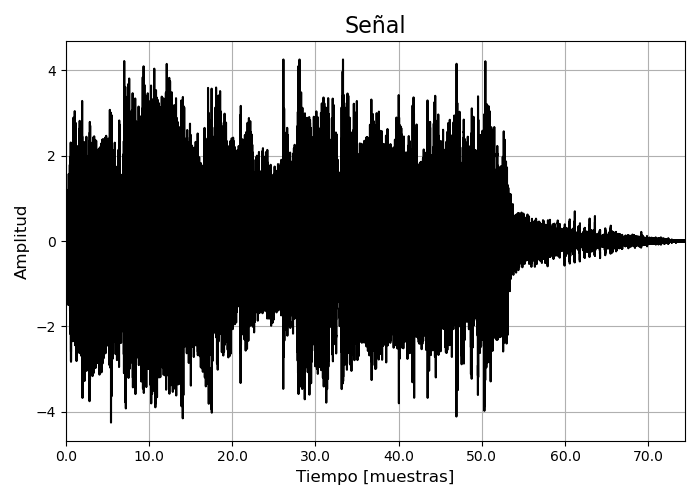

In [16]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(zscore_norm,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(zscore_norm)])
ticks=[i for i in range(0,len(zscore_norm),int(1e5))]
ticks1=[i/1e4 for i in range(0,len(zscore_norm),int(1e5))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1);

Se puede apreciar una diferenciación notable en cuanto a las dos normalizaciones previamente vistas, ya que se hace evidente el crecimiento de la amplitud de la señal con un rango que supera levemente a los $[-4, 4]$. Esto se debe a la relación entre el promedio de la señal y la desviación estandar.

### Normalizacion por RMS.

En general, hay dos tipos principales de normalización de audio:

* Normalización de picos que ajusta la grabación en función de su nivel de señal más alto.
* Normalización de la sonoridad que ajusta la grabación en función de su sonoridad percibida.

La normalización RMS cae bajo este último, donde el nivel de sonoridad percibida se determina utilizando la raíz cuadrada media de la señal. El resultado luego se usa para calcular el valor de ganancia usado en la normalización. Dado que el valor de ganancia es constante y se aplica a toda la grabación, la normalización no afecta la relación señal / ruido y la dinámica relativa . El enfoque de la normalización RMS se puede resumir en la siguiente fórmula matemática:

$$
\begin{equation}
    y[n] = \sqrt{\left(\frac{N-10(\frac{r}{20})}{\sum_{i=0}^{N-1}x^{2}[i]}\right)}\cdot x[n]
\end{equation}
$$
Donde:

* $x[n]$ $................$ Señal de audio.
* $y[n]$ $................$ Señal normalizada.
* N   $...................$ Largo de la señal.
* $r$ $...................$ Nivel RMS de entrada en dB.



#### Código de Normalización por RMS

In [22]:
### RMS Normalizacion.
r= 20
N= len(sig)

for i in range(0,N-1):
    num = N-(10*(r/20))
    den = np.sum(sig[i]**2)
    raiz = np.sqrt(num/den)
rms_norm=raiz*sig

C:\Users\benja\miniconda3\envs\ACUS220\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


<IPython.core.display.Javascript object>


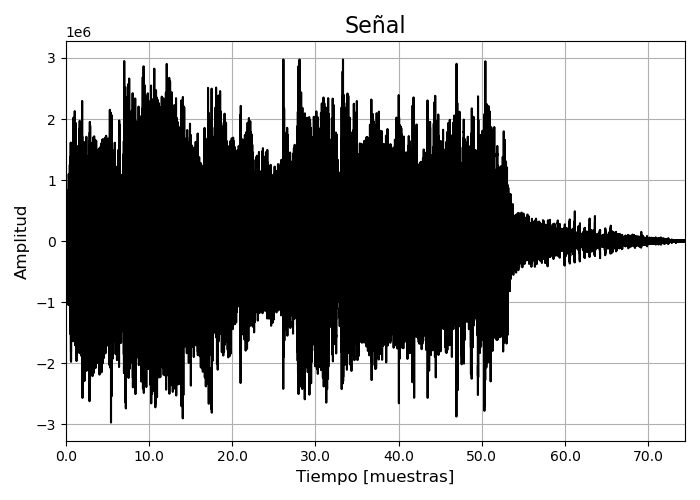

In [23]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5),tight_layout=True)

ax.plot(rms_norm,c='k')
ax.set_xlabel('Tiempo [muestras]',fontsize=12)
ax.set_ylabel('Amplitud',fontsize=12)
ax.set_title('Señal',fontsize=16)
ax.grid(True)
ax.set_xlim([-1,len(rms_norm)])
ticks=[i for i in range(0,len(rms_norm),int(1e5))]
ticks1=[i/1e4 for i in range(0,len(rms_norm),int(1e5))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks1);

Se puede apreciar como esta normalización realiza una suerte de reescalado de la señal original donde su rango dinámico está entre $[-3, 3]$.

## Ejercicio 3 
1. Comparar señal original con señales resultantes. 
1. Discutir.
1. Concluir.

#### Comparativa Señal original vs Señales normalizadas

Se puede notar una diferencia sustancial entre la señal original y las normalizadas, estas radican principalmente en la amplitud que cada una de estas posee, ya que todas estas normalizaciones amplían el rango dinámico del audio. 

Si observamos el rango dinámico por la normalización de Max Normalization, es observable que este rango se encuentre dentro de $[-1, 1]$, esto es muy parecido respecto a la señal original.

Y si vemos la señal normalizada por MinMax notamos que las amplitudes varían entre $[0, 1]$.

Por otro lado, se puede notar que en el caso de la normalización por Z-score, se consiguió una diferenciación aún mayor a la señal original.

Y por último, con una diferenciación no tan alta como lo fue en el caso del Z-score, encontramos a la normalización por Root Mean Square (RMS), el cual evidencia el proceso de reescalado que se consigue aplicando este tipo de normalización.

#### Conclusión

Tras el desarrollo de este informe es que se puede llegar a diversas concusiones a nivel matemático como también de la propia naturaleza del audio, sin ir más lejos este proceso de normalización existe en procedimientos de producción de audio en donde lo que muchas veces se busca conseguir que en mezclas de este estilo que diferentes pistas logren alcanzar niveles similares de rango dinámico o amplitud sin que se generen distorsiones que puedan dañar a fidelidad de la señal original.

Por otro lado, es relevante conocer las diferentes opciones que existen de normalización, esto radica en quizás en otras ocasiones se puede estar trabajando con otro tipo de señal o arreglos y el tener conocimiento de los resultados que se pueden obtener de esto modelos de normalización puede significar a futuro una gran ventaja en temas de tiempo a la hora de escoger como trabajar con este tipo de desafíos.